In [1]:
import numpy as np 
import pandas as pd # for data manipulation and analysis
import pandas as pd
from ydata_profiling import ProfileReport # generating data profiling reports
import warnings # to suppress warnings.
warnings.filterwarnings("ignore")
# Importing Libraries is done.

In [2]:
df1 = pd.read_csv('/kaggle/input/residential-ev-chargingfrom-apartment-buildings/archive (34)/Dataset 1_EV charging reports.csv',sep=';')
df2 = pd.read_csv('/kaggle/input/residential-ev-chargingfrom-apartment-buildings/archive (34)/Dataset 2_Hourly EV loads - Per user.csv',sep=';')
df3a = pd.read_csv('/kaggle/input/residential-ev-chargingfrom-apartment-buildings/archive (34)/Dataset 3a_Hourly EV loads - Aggregated private.csv',sep=';')
df3b = pd.read_csv('/kaggle/input/residential-ev-chargingfrom-apartment-buildings/archive (34)/Dataset 3b_Hourly EV loads - Aggregated shared.csv',sep=';')
df5 = pd.read_csv('/kaggle/input/residential-ev-chargingfrom-apartment-buildings/archive (34)/Dataset 5_AMS data from garage Bl2.csv',sep=';')
df6 = pd.read_csv('/kaggle/input/residential-ev-chargingfrom-apartment-buildings/archive (34)/Dataset 6_Local traffic distribution.csv',sep=';')
df_weather = pd.read_csv("/kaggle/input/residential-ev-chargingfrom-apartment-buildings/archive (34)/Norway_Trondheim_ExactLoc_Weather.csv")
# The script reads several CSV files into pandas DataFrames. Each DataFrame corresponds to a different dataset related to EV charging and 
# other relevant data such as weather and traffic distribution. The datasets include information on EV charging reports, hourly EV loads, garage data, 
# traffic distribution, and weather data.

In [3]:
# Data Cleaning
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


df1.dropna(inplace=True)
# The dropna() method is used to remove rows with missing values from df1.
# The str.replace() method is used to remove commas from certain columns (El_kWh and Duration_hours) in df1. 
# Then, these columns are converted to float data type using the astype() method.


df1['El_kWh'] = df1['El_kWh'].str.replace(',', '').astype(float)  # Convert to numerical
df1['Duration_hours'] = df1['Duration_hours'].str.replace(',', '').astype(float)  # Convert to numerical

# One-hot encode on categorical features
df1 = pd.get_dummies(df1, columns=['User_type','Garage_ID', 'User_ID', 'Shared_ID', 'month_plugin', 'weekdays_plugin', 'Plugin_category', 'Duration_category'])

# The pd.get_dummies() function is applied to df1 to perform one-hot encoding on categorical features. 
# This creates binary columns for each category within categorical variables such as User_type, Garage_ID, User_ID, Shared_ID, month_plugin, weekdays_plugin, Plugin_category, and Duration_category.

In [4]:
# Machine Learning Preparation:

# An IsolationForest model is instantiated with the contamination parameter set to 0.05. contamination represents the proportion of outliers in the data. 
# The lower this value, the more outliers are expected to be detected.

outlier_detector = IsolationForest(contamination=0.05)  # Adjust the contamination parameter
df1['outlier'] = outlier_detector.fit_predict(df1[['El_kWh', 'Duration_hours']])

# Remove outliers
df1 = df1[df1['outlier'] != -1]

# Feature Scaling:
# A StandardScaler object is created to scale the numerical features El_kWh and Duration_hours in df1 to have zero mean and unit variance.
scaler = StandardScaler()
df1[['El_kWh', 'Duration_hours']] = scaler.fit_transform(df1[['El_kWh', 'Duration_hours']])

X = df1.drop(columns=['Duration_hours','session_ID','Start_plugin', 'Start_plugin_hour', 'End_plugout', 'End_plugout_hour'])  # All columns except Duration_hours
y = df1['Duration_hours']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
df1 = pd.read_csv('/kaggle/input/residential-ev-chargingfrom-apartment-buildings/archive (34)/Dataset 1_EV charging reports.csv',sep=';')
df2 = pd.read_csv('/kaggle/input/residential-ev-chargingfrom-apartment-buildings/archive (34)/Dataset 2_Hourly EV loads - Per user.csv',sep=';')
df3a = pd.read_csv('/kaggle/input/residential-ev-chargingfrom-apartment-buildings/archive (34)/Dataset 3a_Hourly EV loads - Aggregated private.csv',sep=';')
df3b = pd.read_csv('/kaggle/input/residential-ev-chargingfrom-apartment-buildings/archive (34)/Dataset 3b_Hourly EV loads - Aggregated shared.csv',sep=';')
df5 = pd.read_csv('/kaggle/input/residential-ev-chargingfrom-apartment-buildings/archive (34)/Dataset 5_AMS data from garage Bl2.csv',sep=';')
df6 = pd.read_csv('/kaggle/input/residential-ev-chargingfrom-apartment-buildings/archive (34)/Dataset 6_Local traffic distribution.csv',sep=';')
df_weather = pd.read_csv("/kaggle/input/residential-ev-chargingfrom-apartment-buildings/archive (34)/Norway_Trondheim_ExactLoc_Weather.csv")

In [6]:
df1['Start_plugin'] # Date Formatting:

0       21.12.2018 10:20
1       21.12.2018 10:24
2       21.12.2018 11:33
3       22.12.2018 16:15
4       24.12.2018 22:03
              ...       
6873    31.01.2020 17:57
6874    31.01.2020 18:32
6875    31.01.2020 19:25
6876    31.01.2020 19:27
6877    31.01.2020 20:42
Name: Start_plugin, Length: 6878, dtype: object

In [7]:
df1['Start_plugin'] = pd.to_datetime(df1['Start_plugin'], format='%d.%m.%Y %H:%M')

# Extract the hour component and format it to match df6's 'Date_from'
df1['Start_plugin'] = df1['Start_plugin'].dt.strftime('%d.%m.%Y %H:00')

# The 'Start_plugin' column in df1 is converted to datetime format using pd.to_datetime() with the specified date format '%d.%m.%Y %H:%M'.
# The hour component of the 'Start_plugin' column is extracted and formatted to match the 'Date_from' column in df6 by using the dt.strftime() method.

In [8]:
df1.shape # Data Exploration:

(6878, 15)

In [9]:
df1['Start_plugin']
# The shape of df1 is printed to check the number of rows and columns.
# The 'Start_plugin' column of df1 and the 'Date_from' column of df6 are printed to inspect the values.

0       21.12.2018 10:00
1       21.12.2018 10:00
2       21.12.2018 11:00
3       22.12.2018 16:00
4       24.12.2018 22:00
              ...       
6873    31.01.2020 17:00
6874    31.01.2020 18:00
6875    31.01.2020 19:00
6876    31.01.2020 19:00
6877    31.01.2020 20:00
Name: Start_plugin, Length: 6878, dtype: object

In [10]:
df6['Date_from'] 

0        01.12.2018 00:00
1        01.12.2018 01:00
2        01.12.2018 02:00
3        01.12.2018 03:00
4        01.12.2018 04:00
               ...       
10243    31.01.2020 19:00
10244    31.01.2020 20:00
10245    31.01.2020 21:00
10246    31.01.2020 22:00
10247    31.01.2020 23:00
Name: Date_from, Length: 10248, dtype: object

In [11]:
# The merge() function is used to merge df1 and df6 DataFrames based on the columns 'Start_plugin' and 'Date_from'.
# The left_on and right_on parameters specify the columns to join on.
# The result of the merge operation is stored in a new DataFrame called merged_data.
merged_data = df1.merge(
    df6,
    left_on='Start_plugin',
    right_on='Date_from',
)

# Drop unnecessary date and hour columns
merged_data.drop([], axis=1, inplace=True)

In [12]:
merged_data.shape

(6878, 22)

In [13]:
merged_data.head()

,session_ID,Garage_ID,User_ID,User_type,Shared_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,...,weekdays_plugin,Plugin_category,Duration_category,Date_from,Date_to,KROPPAN BRU,MOHOLTLIA,SELSBAKK,MOHOLT RAMPE 2,Jonsvannsveien vest for Steinanvegen
0,1,AdO3,AdO3-4,Private,NaN,21.12.2018 10:00,10,21.12.2018 10:23,10.0,"0,3",...,Friday,late morning (9-12),Less than 3 hours,21.12.2018 10:00,21.12.2018 11:00,3244,1632,545,194,622
1,2,AdO3,AdO3-4,Private,NaN,21.12.2018 10:00,10,21.12.2018 10:32,10.0,"0,87",...,Friday,late morning (9-12),Less than 3 hours,21.12.2018 10:00,21.12.2018 11:00,3244,1632,545,194,622
2,3,AdO3,AdO3-4,Private,NaN,21.12.2018 11:00,11,21.12.2018 19:46,19.0,"29,87",...,Friday,late morning (9-12),Between 6 and 9 hours,21.12.2018 11:00,21.12.2018 12:00,3605,1691,605,230,771
3,4,AdO3,AdO3-2,Private,NaN,22.12.2018 16:00,16,23.12.2018 16:40,16.0,"15,56",...,Saturday,late afternoon (15-18),More than 18 hours,22.12.2018 16:00,22.12.2018 17:00,3052,1484,453,224,694
4,5,AdO3,AdO3-2,Private,NaN,24.12.2018 22:00,22,24.12.2018 23:02,23.0,"3,62",...,Monday,late evening (21-midnight),Less than 3 hours,24.12.2018 22:00,24.12.2018 23:00,1390,693,226,83,353


In [14]:
merged_data['Start_plugin'] = pd.to_datetime(merged_data['Start_plugin'], format='%d.%m.%Y %H:%M')

# Extract the date component as date objects
merged_data['Start_plugin_date'] = merged_data['Start_plugin'].dt.date

In [15]:
df_weather.datetime

0      2018-12-01
1      2018-12-02
2      2018-12-03
3      2018-12-04
4      2018-12-05
          ...    
422    2020-01-27
423    2020-01-28
424    2020-01-29
425    2020-01-30
426    2020-01-31
Name: datetime, Length: 427, dtype: object

In [16]:
merged_data.Start_plugin_date

0       2018-12-21
1       2018-12-21
2       2018-12-21
3       2018-12-22
4       2018-12-24
           ...    
6873    2020-01-31
6874    2020-01-31
6875    2020-01-31
6876    2020-01-31
6877    2020-01-31
Name: Start_plugin_date, Length: 6878, dtype: object

In [17]:
# This portion of the code performs additional data preprocessing steps, merges the merged_data DataFrame with df_weather, and further prepares the data for analysis. 

# Converting to Datetime:

# The 'datetime' column in the df_weather DataFrame is converted to datetime format using pd.to_datetime()
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])
# The 'Start_plugin_date' column in the merged_data DataFrame is also converted to datetime format using pd.to_datetime()
merged_data['Start_plugin_date'] = pd.to_datetime(merged_data['Start_plugin_date'])

In [18]:
# Merging DataFrames:

# The merge() function is used to merge merged_data and df_weather DataFrames based on the columns 'Start_plugin_date' and 'datetime'.
# The result of the merge operation is stored in a new DataFrame called df.
df = merged_data.merge(
    df_weather,
    left_on='Start_plugin_date',
    right_on='datetime'
)

# Drop unnecessary date and hour columns
df.drop(['Date_from','Date_to','Unnamed: 0','datetime'], axis=1, inplace=True)
# Columns 'Date_from', 'Date_to', 'Unnamed: 0', and 'datetime' are dropped from the df DataFrame using the drop() method. 
# These columns are likely dropped because they are either redundant or not needed for further analysis.

In [19]:
df

,session_ID,Garage_ID,User_ID,User_type,Shared_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,...,solar_rad,t_dhi,t_dni,t_ghi,t_solar_rad,temp,ts,wind_dir,wind_gust_spd,wind_spd
0,1,AdO3,AdO3-4,Private,NaN,2018-12-21 10:00:00,10,21.12.2018 10:23,10.0,"0,3",...,1,81,547,70,35,-0.5,1545346800,176,12.0,2.4
1,2,AdO3,AdO3-4,Private,NaN,2018-12-21 10:00:00,10,21.12.2018 10:32,10.0,"0,87",...,1,81,547,70,35,-0.5,1545346800,176,12.0,2.4
2,3,AdO3,AdO3-4,Private,NaN,2018-12-21 11:00:00,11,21.12.2018 19:46,19.0,"29,87",...,1,81,547,70,35,-0.5,1545346800,176,12.0,2.4
3,4,AdO3,AdO3-2,Private,NaN,2018-12-22 16:00:00,16,23.12.2018 16:40,16.0,"15,56",...,2,81,548,70,58,-2.2,1545433200,137,9.2,1.9
4,5,AdO3,AdO3-2,Private,NaN,2018-12-24 22:00:00,22,24.12.2018 23:02,23.0,"3,62",...,0,82,558,72,7,1.1,1545606000,203,12.4,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6873,6874,UT15,UT15-2,Private,NaN,2020-01-31 17:00:00,17,31.01.2020 22:29,22.0,"13,43",...,5,256,2229,477,120,2.6,1580425200,157,14.0,4.1
6874,6875,AsO10,AsO10-1,Private,NaN,2020-01-31 18:00:00,18,31.01.2020 21:43,21.0,"9,1",...,5,256,2229,477,120,2.6,1580425200,157,14.0,4.1
6875,6876,Bl2,Bl2-1,Private,NaN,2020-01-31 19:00:00,19,31.01.2020 20:37,20.0,"4,28",...,5,256,2229,477,120,2.6,1580425200,157,14.0,4.1
6876,6877,UT7,UT7-1,Private,NaN,2020-01-31 19:00:00,19,31.01.2020 19:48,19.0,"2,31",...,5,256,2229,477,120,2.6,1580425200,157,14.0,4.1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6878 entries, 0 to 6877
Data columns (total 55 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   session_ID                            6878 non-null   int64         
 1   Garage_ID                             6878 non-null   object        
 2   User_ID                               6878 non-null   object        
 3   User_type                             6878 non-null   object        
 4   Shared_ID                             1412 non-null   object        
 5   Start_plugin                          6878 non-null   datetime64[ns]
 6   Start_plugin_hour                     6878 non-null   int64         
 7   End_plugout                           6844 non-null   object        
 8   End_plugout_hour                      6844 non-null   float64       
 9   El_kWh                                6878 non-null   object        
 10  

In [21]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
object_columns

['Garage_ID',
 'User_ID',
 'User_type',
 'Shared_ID',
 'End_plugout',
 'El_kWh',
 'Duration_hours',
 'month_plugin',
 'weekdays_plugin',
 'Plugin_category',
 'Duration_category',
 'KROPPAN BRU',
 'MOHOLTLIA',
 'SELSBAKK',
 'revision_status']

In [22]:
df.to_csv("df1_traffic_weather.csv")

In [23]:
df = df.drop(['snow_depth','revision_status','End_plugout',"Start_plugin_date"],axis=1)
df['El_kWh'] = df['El_kWh'].str.replace(',', '').astype(float)  # Convert to numerical
df['Duration_hours'] = df['Duration_hours'].str.replace(',', '').astype(float)  # Convert to numerical

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['User_type','KROPPAN BRU', 'MOHOLTLIA', 'SELSBAKK','Garage_ID', 'User_ID', 'Shared_ID', 'month_plugin', 'weekdays_plugin', 'Plugin_category', 'Duration_category'])

In [24]:
df.dropna(inplace=True) # Removing Missing Values

In [25]:
df # The resulting DataFrame df is displayed, which contains the preprocessed and merged data with one-hot encoded categorical features and removed missing values.

,session_ID,Start_plugin,Start_plugin_hour,End_plugout_hour,El_kWh,Duration_hours,MOHOLT RAMPE 2,Jonsvannsveien vest for Steinanvegen,clouds,dewpt,...,Plugin_category_late evening (21-midnight),Plugin_category_late morning (9-12),Plugin_category_late night (3-6),Duration_category_Between 12 and 15 hours,Duration_category_Between 15 and 18 hours,Duration_category_Between 3 and 6 hours,Duration_category_Between 6 and 9 hours,Duration_category_Between 9 and 12 hours,Duration_category_Less than 3 hours,Duration_category_More than 18 hours
0,1,2018-12-21 10:00:00,10,10.0,3.0,5.000000e+00,194,622,55,-6.7,...,False,True,False,False,False,False,False,False,True,False
1,2,2018-12-21 10:00:00,10,10.0,87.0,1.366667e+08,194,622,55,-6.7,...,False,True,False,False,False,False,False,False,True,False
2,3,2018-12-21 11:00:00,11,19.0,2987.0,8.216389e+09,230,771,55,-6.7,...,False,True,False,False,False,False,True,False,False,False
3,4,2018-12-22 16:00:00,16,16.0,1556.0,2.441972e+09,224,694,61,-7.6,...,False,False,False,False,False,False,False,False,False,True
4,5,2018-12-24 22:00:00,22,23.0,362.0,9.705556e+08,83,353,100,-0.9,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6873,6874,2020-01-31 17:00:00,17,22.0,1343.0,4.530000e+02,172,769,83,-3.0,...,False,False,False,False,False,True,False,False,False,False
6874,6875,2020-01-31 18:00:00,18,21.0,91.0,3.182222e+09,159,609,83,-3.0,...,False,False,False,False,False,True,False,False,False,False
6875,6876,2020-01-31 19:00:00,19,20.0,428.0,1.203889e+09,163,464,83,-3.0,...,False,False,False,False,False,False,False,False,True,False
6876,6877,2020-01-31 19:00:00,19,19.0,231.0,3.525000e+03,163,464,83,-3.0,...,False,False,False,False,False,False,False,False,True,False


In [26]:
df.columns

Index(['session_ID', 'Start_plugin', 'Start_plugin_hour', 'End_plugout_hour',
       'El_kWh', 'Duration_hours', 'MOHOLT RAMPE 2',
       'Jonsvannsveien vest for Steinanvegen', 'clouds', 'dewpt',
       ...
       'Plugin_category_late evening (21-midnight)',
       'Plugin_category_late morning (9-12)',
       'Plugin_category_late night (3-6)',
       'Duration_category_Between 12 and 15 hours',
       'Duration_category_Between 15 and 18 hours',
       'Duration_category_Between 3 and 6 hours',
       'Duration_category_Between 6 and 9  hours',
       'Duration_category_Between 9 and 12 hours',
       'Duration_category_Less than 3 hours',
       'Duration_category_More than 18 hours'],
      dtype='object', length=5039)

In [27]:
# A StandardScaler object is created to scale the numerical features 'El_kWh' and 'Duration_hours' in the DataFrame df.
scaler = StandardScaler()
# The fit_transform() method of the StandardScaler object is applied to the selected columns of df to scale them. 
# This step standardizes the features by removing the mean and scaling to unit variance.
df[['El_kWh', 'Duration_hours']] = scaler.fit_transform(df[['El_kWh', 'Duration_hours']])

X = df.drop(columns=['Duration_hours','session_ID','Start_plugin', 'Start_plugin_hour', 'End_plugout_hour'])  # All columns except Duration_hours
y = df['Duration_hours']  # Target variable

# The data is split into training and testing sets using train_test_split(), with a test size of 20% and a random state of 42 for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Importing Libraries and Metrics:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

In [29]:
# A custom function symmetric_mean_absolute_percentage_error is defined to calculate the Symmetric Mean Absolute Percentage Error (SMAPE).
def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    """
    Calculate Symmetric Mean Absolute Percentage Error (SMAPE)
    :param y_true: Array of true values
    :param y_pred: Array of predicted values
    :return: SMAPE score
    """
    return 100 * (2 * abs(y_pred - y_true) / (abs(y_true) + abs(y_pred))).mean()
# SMAPE is a metric commonly used to evaluate the accuracy of forecasts when there are zero values in the dataset.

# RANDOM FOREST REGRESSOR

In [30]:
# This code segment trains a RandomForestRegressor model on the training data (X_train and y_train) and evaluates its performance on the test data (X_test and y_test).
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [31]:
# The trained model (rf) is used to predict the target variable (y_pred) for the test features (X_test) using the predict() method.
print("Random Forest Regressor:")
print("Score:", rf.score(X_test, y_test))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test, y_pred))
print("Root Mean Squared Error:", sqrt(mean_squared_error(y_test, y_pred)))
print("Symmetric Mean Absolute Percentage Error:", symmetric_mean_absolute_percentage_error(y_test, y_pred))

Random Forest Regressor:
Score: 0.41465126189078794
Mean Squared Error: 0.6127047576384768
Mean Absolute Error: 0.4211681836037708
Mean Absolute Percentage Error: 1.2811912469937408
Root Mean Squared Error: 0.7827545960506886
Symmetric Mean Absolute Percentage Error: 71.3673931790811


# R² Score (rf.score()): This metric indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R² score indicates a better fit of the model to the data.

# Mean Squared Error (mean_squared_error()): This metric measures the average of the squares of the errors between the actual and predicted values. It gives a sense of the average magnitude of error.

# Mean Absolute Error (mean_absolute_error()): This metric measures the average of the absolute differences between the actual and predicted values. It gives a sense of the average magnitude of error without considering the direction.

# Mean Absolute Percentage Error (mean_absolute_percentage_error()): This metric measures the average of the absolute percentage differences between the actual and predicted values. It provides insight into the average relative error.

# Root Mean Squared Error (sqrt(mean_squared_error())): This metric is the square root of the mean squared error. It's another measure of the average magnitude of error.

# Symmetric Mean Absolute Percentage Error : This custom metric calculates the symmetric mean absolute percentage error, which is particularly useful when dealing with datasets containing zero values.

# LGBM REGRESSOR

In [32]:
# LGBMRegressor model on the training data (X_train and y_train) and evaluates its performance on the test data (X_test and y_test)
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6065
[LightGBM] [Info] Number of data points in the train set: 5475, number of used features: 194
[LightGBM] [Info] Start training from score -0.007345


In [33]:
print("LGBM Regressor:")
print("Score:", lgbm.score(X_test, y_test))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test, y_pred))
print("Root Mean Squared Error:", sqrt(mean_squared_error(y_test, y_pred)))
print("Symmetric Mean Absolute Percentage Error:", symmetric_mean_absolute_percentage_error(y_test, y_pred))

LGBM Regressor:
Score: 0.41970832606961306
Mean Squared Error: 0.6074113537574708
Mean Absolute Error: 0.45261502447838303
Mean Absolute Percentage Error: 1.512646734046199
Root Mean Squared Error: 0.7793659947402574
Symmetric Mean Absolute Percentage Error: 80.64713796997528


# XGB Regressor

In [34]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [35]:
print("XGB Regressor:")
print("Score:", xgb.score(X_test, y_test))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test, y_pred))
print("Root Mean Squared Error:", sqrt(mean_squared_error(y_test, y_pred)))
print("Symmetric Mean Absolute Percentage Error:", symmetric_mean_absolute_percentage_error(y_test, y_pred))

XGB Regressor:
Score: 0.42759162035883536
Mean Squared Error: 0.5991596371270174
Mean Absolute Error: 0.44538373827308864
Mean Absolute Percentage Error: 1.3928657258350372
Root Mean Squared Error: 0.7740540272661963
Symmetric Mean Absolute Percentage Error: 80.46514467609217


# GRADIENT BOOSTING REGRESSOR

In [36]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

In [37]:
print("Gradient Boosting Regressor:")
print("Score:", gbr.score(X_test, y_test))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test, y_pred))
print("Root Mean Squared Error:", sqrt(mean_squared_error(y_test, y_pred)))
print("Symmetric Mean Absolute Percentage Error:", symmetric_mean_absolute_percentage_error(y_test, y_pred))

Gradient Boosting Regressor:
Score: 0.45017250235239903
Mean Squared Error: 0.575523447402204
Mean Absolute Error: 0.4486010041794218
Mean Absolute Percentage Error: 1.2064020720871382
Root Mean Squared Error: 0.7586326168852773
Symmetric Mean Absolute Percentage Error: 84.49570661520467


# GRAPHS

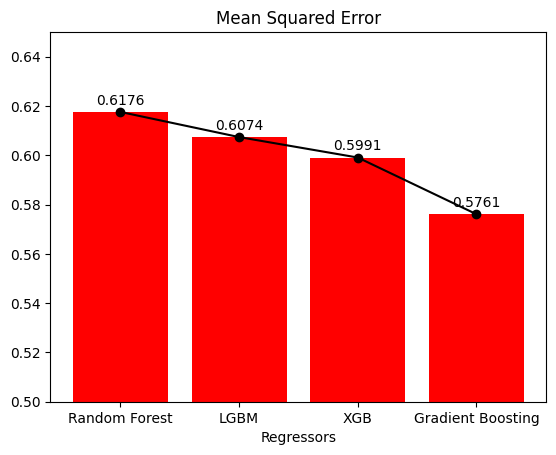

In [38]:
# MSE

import matplotlib.pyplot as plt
# The addlabels() function is defined to add numerical labels on top of each bar in the bar plot. 
# It takes two arguments: x, which represents the x-axis values (names of regressors), and y, which represents the y-axis values (MSE values)
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.003, y[i], ha = 'center')
        
# mse is defined, containing the MSE values for each regression model: Random Forest, LGBM, XGB, and Gradient Boosting.
mse = [0.6176, 0.6074, 0.5991, 0.5761]
# names is defined, containing the names of the regression models.
names = ['Random Forest', 'LGBM', 'XGB', 'Gradient Boosting']
# The plt.bar() function is used to create a bar plot. It takes the names list as the x-axis values, the mse list as the y-axis values, and the color 'red' for the bars.
plt.bar(names, mse, color='red')
#  to add numerical labels on top of each bar.
addlabels(names, mse)
plt.ylim(0.5, 0.65)
# to plot the MSE values as a line plot with markers & (marker='o') to show the trend of MSE values across different regressors.
plt.plot(mse, marker='o', color='black')
# The plt.title() function is used to add a title to the plot.
# The plt.xlabel() function is used to add a label to the x-axis.
plt.title('Mean Squared Error')
plt.xlabel('Regressors')
#  to display the generated plot.
plt.show()


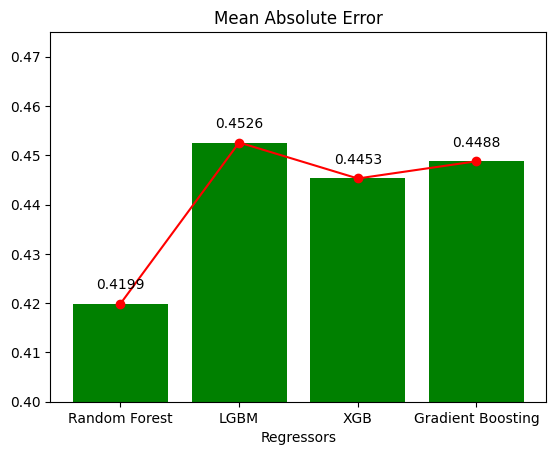

In [39]:
# MAE

import matplotlib.pyplot as plt

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.003, y[i], ha = 'center')
        

mse = [0.4199, 0.4526, 0.4453, 0.4488]
names = ['Random Forest', 'LGBM', 'XGB', 'Gradient Boosting']
plt.bar(names, mse, color='green')
addlabels(names, mse)
plt.ylim(0.4, 0.475) #  to set the limits of the y-axis to improve the visualization.
plt.plot(mse, marker='o', color='red')
plt.title('Mean Absolute Error')
plt.xlabel('Regressors')

plt.show()

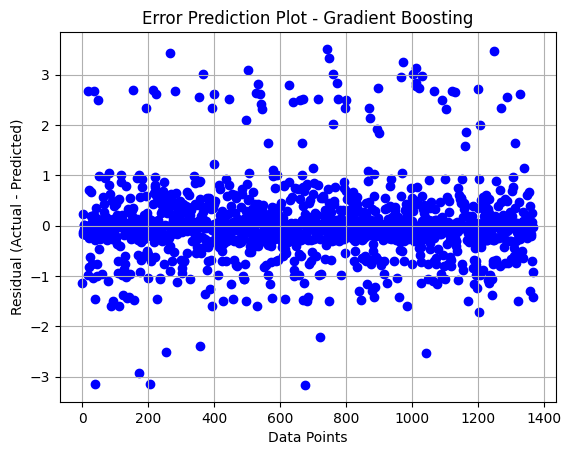

In [40]:
# Predictions (y_pred_gbr) are made on the test set (X_test) using the trained Gradient Boosting Regressor model (gbr).
y_pred_gbr = gbr.predict(X_test) 
# Residuals are calculated by subtracting the predicted values (y_pred_gbr) from the actual values (y_test). (to get the error)
residuals = y_test - y_pred_gbr
#This for_x is containing indices ranging from 0 to the length of the residuals. This list represents the data points or instances in the test set.
for_x = [x for x in range(len(residuals))]
# The marker='o' argument specifies that circular markers should be used for each point.
# The color of the markers is set to blue (color='blue') and the linestyle is set to solid (linestyle='-').
plt.scatter(for_x, residuals, marker='o', color='blue', linestyle='-')
plt.title('Error Prediction Plot - Gradient Boosting')
plt.xlabel('Data Points')
plt.ylabel('Residual (Actual - Predicted)')
plt.grid(True) # to display a grid in the plot, making it easier to read.
plt.show()

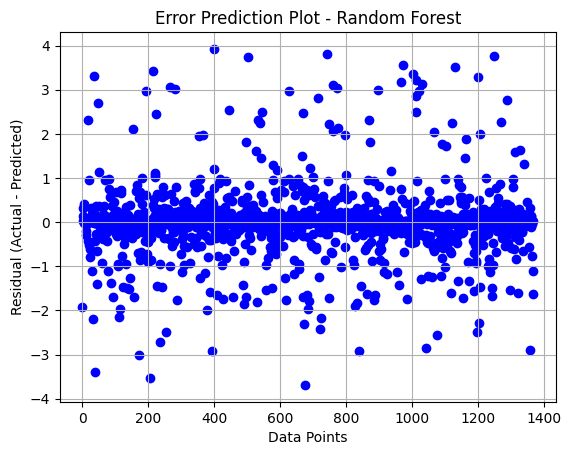

In [41]:
y_pred_rf = rf.predict(X_test)
residuals = y_test - y_pred_rf
for_x = [x for x in range(len(residuals))]

plt.scatter(for_x, residuals, marker='o', color='blue', linestyle='-')
plt.title('Error Prediction Plot - Random Forest')
plt.xlabel('Data Points')
plt.ylabel('Residual (Actual - Predicted)')
plt.grid(True)
plt.show()

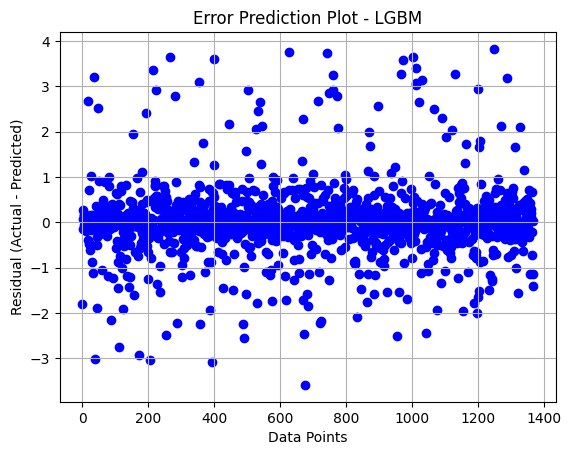

In [42]:
y_pred_lgbm = lgbm.predict(X_test)
residuals = y_test - y_pred_lgbm
for_x = [x for x in range(len(residuals))]

plt.scatter(for_x, residuals, marker='o', color='blue', linestyle='-')
plt.title('Error Prediction Plot - LGBM')
plt.xlabel('Data Points')
plt.ylabel('Residual (Actual - Predicted)')
plt.grid(True)
plt.show()

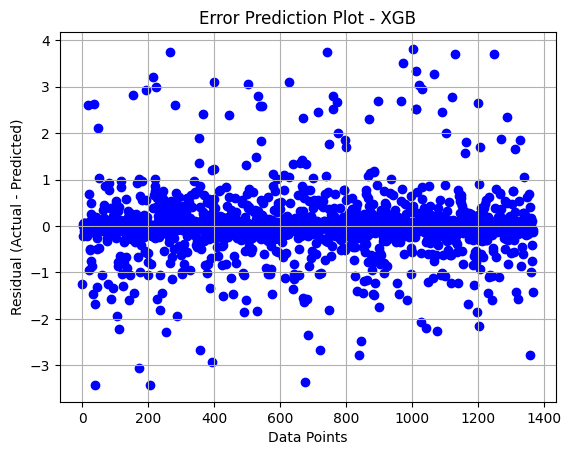

In [43]:
y_pred_xgb = xgb.predict(X_test)
residuals = y_test - y_pred_xgb
for_x = [x for x in range(len(residuals))]

plt.scatter(for_x, residuals, marker='o', color='blue', linestyle='-')
plt.title('Error Prediction Plot - XGB')
plt.xlabel('Data Points')
plt.ylabel('Residual (Actual - Predicted)')
plt.grid(True)
plt.show()
#  It helps in understanding how well the model performs across different data points and whether there are any patterns or trends in the errors.
# Lesser the range of residual means better the accuracy in predictes output.
# and if it is more dense around 0 ; better the accuracy.